In [13]:
# Author: Roi Yehoshua <roiyeho@gmail.com>
# August 2024
# License: MIT

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

Implementation from Scratch

In [15]:
from sklearn.base import BaseEstimator, ClassifierMixin

class Perceptron(BaseEstimator, ClassifierMixin):
    def __init__(self, alpha, max_epochs, shuffle=True, random_state=None):
        self.alpha = alpha  # Learning rate
        self.max_epochs = max_epochs  # Maximum number of training epochs
        self.shuffle = shuffle  # Whether to shuffle the data every epoch
        self.random_state = np.random.RandomState(random_state)  # Random number generator
        
    def fit(self, X, y):
        n_samples, n_features = X.shape  
        
        # Initialize the weights and bias
        self.w = self.random_state.randn(n_features)
        self.b = 0

        self.errors_ = []  # Tracks the misclassification errors
        
        # The training loop
        for epoch in range(self.max_epochs):
            if self.shuffle:
                # Shuffle training data
                indices = np.arange(n_samples)
                self.random_state.shuffle(indices)
                X = X[indices]
                y = y[indices]
            
            n_errors = 0            
            for i in range(n_samples):
                y_pred = self.predict(X[i])
                if y_pred != y[i]:
                    # Update weights and bias
                    self.w += self.alpha * (y[i] - y_pred) * X[i]
                    self.b += self.alpha * (y[i] - y_pred)
                    n_errors += 1
            self.errors_.append(n_errors)
            
            # Print the number of misclassifications every 10 epochs
            if epoch % 10 == 0:
                print(f'Epoch {epoch}: errors = {n_errors}')
            
            # Stop training when there are no more errors
            if n_errors == 0:
                print(f'Training stopped early at epoch {epoch}')
                break
                
    def predict(self, X):
        # Compute net input
        z = X @ self.w + self.b

        # Apply step function
        return np.heaviside(z, 1) 

Evaluation

In [16]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data[:, :2]  # Take only the first two features
y = iris.target

# Filter for setosa and versicolor flowers
X = X[(y == 0) | (y == 1)]
y = y[(y == 0) | (y == 1)]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [17]:
clf = Perceptron(alpha=0.1, max_epochs=1000, random_state=42)
clf.fit(X_train, y_train)

Epoch 0: errors = 23
Epoch 10: errors = 3
Epoch 20: errors = 7
Epoch 30: errors = 6
Epoch 40: errors = 4
Epoch 50: errors = 7
Epoch 60: errors = 4
Epoch 70: errors = 4
Epoch 80: errors = 2
Epoch 90: errors = 5
Epoch 100: errors = 4
Epoch 110: errors = 5
Epoch 120: errors = 3
Epoch 130: errors = 3
Epoch 140: errors = 4
Epoch 150: errors = 2
Epoch 160: errors = 2
Epoch 170: errors = 3
Epoch 180: errors = 2
Epoch 190: errors = 3
Epoch 200: errors = 3
Epoch 210: errors = 1
Epoch 220: errors = 2
Epoch 230: errors = 2
Epoch 240: errors = 1
Epoch 250: errors = 2
Epoch 260: errors = 5
Epoch 270: errors = 2
Epoch 280: errors = 3
Epoch 290: errors = 3
Epoch 300: errors = 5
Epoch 310: errors = 2
Epoch 320: errors = 2
Epoch 330: errors = 2
Epoch 340: errors = 1
Epoch 350: errors = 2
Epoch 360: errors = 4
Epoch 370: errors = 1
Epoch 380: errors = 2
Epoch 390: errors = 3
Epoch 400: errors = 2
Epoch 410: errors = 2
Epoch 420: errors = 1
Epoch 430: errors = 3
Training stopped early at epoch 438


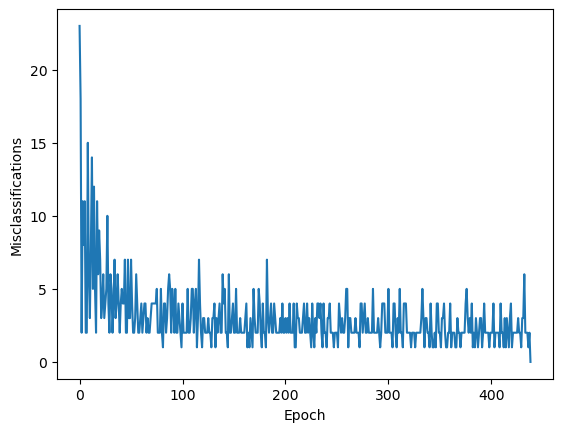

In [18]:
# Plot the learning curve
plt.plot(clf.errors_)
plt.xlabel('Epoch')
plt.ylabel('Misclassifications')
plt.savefig('figures/perceptron_learning_curve.pdf', bbox_inches='tight')

In [19]:
print(f'Train accuracy: {clf.score(X_train, y_train):.4f}')
print(f'Test accuracy: {clf.score(X_test, y_test):.4f}')

Train accuracy: 1.0000
Test accuracy: 1.0000


In [20]:
from matplotlib.colors import ListedColormap

def plot_decision_boundaries(classifier, X, y, feature_names, class_labels, ax=None, legend='auto'):
    """Plot the decision boundaries of a classifier along with the dataset points.

    Parameters:
    - classifier: The trained classifier.
    - X: Feature dataset.
    - y: Target labels.
    - feature_names: List of feature names for labeling the axes.
    - class_labels: List of class labels for coloring the points.
    - ax: Matplotlib Axes object where the plot is drawn. If None, uses current axis.
    - legend: Controls the drawing of the legend. Use False to disable the legend.
    """
    if ax is None:
        ax = plt.gca()
        
    # Define colors and markers
    colors = ['red', 'blue']
    markers = ['s', 'o']
    cmap = ListedColormap(colors[:len(class_labels)])
      
    # Setup mesh grid parameters
    resolution = 250  # Number of sample points in each axis
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1     
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, resolution), 
                         np.linspace(y_min, y_max, resolution))
    
    # Classify each point in the mesh grid
    z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape) 
    
    # Generate contour plot
    ax.contourf(xx, yy, z, cmap=cmap, alpha=0.4)    
    
    # Plot the training points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=class_labels[y], style=class_labels[y], 
                    hue_order=class_labels, style_order=class_labels,
                    palette=colors, markers=markers, edgecolor='k', ax=ax, legend=legend)

    ax.set_xlabel(feature_names[0])
    ax.set_ylabel(feature_names[1])    

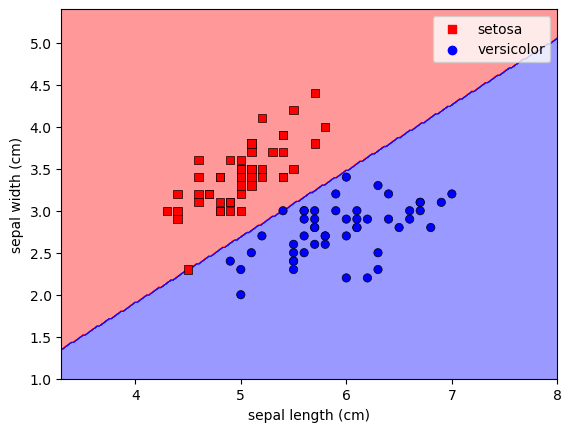

In [21]:
plot_decision_boundaries(clf, X, y, iris.feature_names[:2], iris.target_names[:2])
plt.savefig('figures/perceptron_decision_boundaries.pdf', bbox_inches='tight')

Scikit-Learn Perceptron

In [22]:
from sklearn.linear_model import Perceptron

clf = Perceptron(eta0=0.1, max_iter=1000, tol=None, random_state=42)
clf.fit(X_train, y_train)

Perceptron(eta0=0.1, random_state=42, tol=None)

In [23]:
print(f'Train accuracy: {clf.score(X_train, y_train):.4f}')
print(f'Test accuracy: {clf.score(X_test, y_test):.4f}')

Train accuracy: 1.0000
Test accuracy: 1.0000


In [24]:
clf = Perceptron(eta0=0.1, max_iter=1000, tol=None, random_state=42, verbose=1)
clf.fit(X_train, y_train)

-- Epoch 1
Norm: 1.16, NNZs: 2, Bias: -0.100000, T: 75, Avg. loss: 0.632000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2.39, NNZs: 2, Bias: -0.100000, T: 150, Avg. loss: 0.437400
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 2.87, NNZs: 2, Bias: -0.300000, T: 225, Avg. loss: 0.261667
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 3.28, NNZs: 2, Bias: -0.300000, T: 300, Avg. loss: 0.159493
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 3.37, NNZs: 2, Bias: -0.400000, T: 375, Avg. loss: 0.089093
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 3.78, NNZs: 2, Bias: -0.500000, T: 450, Avg. loss: 0.102147
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 4.05, NNZs: 2, Bias: -0.400000, T: 525, Avg. loss: 0.054693
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 4.14, NNZs: 2, Bias: -0.600000, T: 600, Avg. loss: 0.088960
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 4.39, NNZs: 2, Bias: -0.600000, T: 675, Avg. loss: 0.119027
Total training time: 0.00 se

Perceptron(eta0=0.1, random_state=42, tol=None, verbose=1)